In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=1000
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
os.getcwd()

'C:\\Users\\sotha\\Documents\\GitHub\\CM3203-C1615525\\Code'

In [3]:
%%time
train_df = pd.read_csv("train-flattened.csv", dtype={'fullVisitorId':str})
test_df = pd.read_csv("test-flattened.csv", dtype={'fullVisitorId':str})
sample_submission = pd.read_csv("../Input/sample_submission_v2.csv")

Wall time: 15.3 s


In [4]:
%%time
print("Dimensions of the data (rows, cloumns):\n")
print('Size of train data', train_df.shape)
print('Size of test data', test_df.shape)
print('Size of sample_submission data', sample_submission.shape)
#export to report

Dimensions of the data (rows, cloumns):

Size of train data (1708337, 30)
Size of test data (401589, 30)
Size of sample_submission data (296530, 2)
Wall time: 996 µs


In [5]:
train_df.head()

channelGrouping      date        fullVisitorId     visitId  visitNumber  \
0  Organic Search  20171016  3162355547410993243  1508198450            1   
1        Referral  20171016  8934116514970143966  1508176307            6   
2          Direct  20171016  7992466427990357681  1508201613            1   
3  Organic Search  20171016  9075655783635761930  1508169851            1   
4  Organic Search  20171016  6960673291025684308  1508190552            1   

   visitStartTime device.browser device.deviceCategory  device.isMobile  \
0      1508198450        Firefox               desktop            False   
1      1508176307         Chrome               desktop            False   
2      1508201613         Chrome                mobile             True   
3      1508169851         Chrome               desktop            False   
4      1508190552         Chrome               desktop            False   

  device.operatingSystem                geoNetwork.city geoNetwork.continent  \
0                Windows  not available in demo dataset               Europe   
1              Chrome OS                      Cupertino             Americas   
2                Android  not available in demo dataset             Americas   
3                Windows  not available in demo dataset                 Asia   
4                Windows  not available in demo dataset             Americas   

  geoNetwork.country                   geoNetwork.metro  \
0            Germany      not available in demo dataset   
1      United States  San Francisco-Oakland-San Jose CA   
2      United States      not available in demo dataset   
3             Turkey      not available in demo dataset   
4             Mexico      not available in demo dataset   

  geoNetwork.networkDomain              geoNetwork.region  \
0                (not set)  not available in demo dataset   
1                (not set)                     California   
2      windjammercable.net  not available in demo dataset   
3          unknown.unknown  not available in demo dataset   
4    prod-infinitum.com.mx  not available in demo dataset   

  geoNetwork.subContinent  totals.bounces  totals.hits  totals.newVisits  \
0          Western Europe             1.0            1               1.0   
1        Northern America             NaN            2               NaN   
2        Northern America             NaN            2               1.0   
3            Western Asia             NaN            2               1.0   
4         Central America             NaN            2               1.0   

   totals.pageviews  totals.transactionRevenue trafficSource.adContent  \
0               1.0                        NaN                     NaN   
1               2.0                        NaN                     NaN   
2               2.0                        NaN                     NaN   
3               2.0                        NaN                     NaN   
4               2.0                        NaN                     NaN   

  trafficSource.campaign trafficSource.isTrueDirect trafficSource.keyword  \
0              (not set)                        NaN          water bottle   
1              (not set)                        NaN                   NaN   
2              (not set)                       True                   NaN   
3              (not set)                        NaN        (not provided)   
4              (not set)                        NaN        (not provided)   

  trafficSource.medium                         trafficSource.referralPath  \
0              organic                                                NaN   
1             referral  /a/google.com/transportation/mtv-services/bike...   
2               (none)                                                NaN   
3              organic                                                NaN   
4              organic                                                NaN   

  trafficSource.source                              custo

### The attribute data types

In [6]:
print("The data types in columns and missing data are:")
train_df.info()

The data types in columns and missing data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 30 columns):
channelGrouping               object
date                          int64
fullVisitorId                 object
visitId                       int64
visitNumber                   int64
visitStartTime                int64
device.browser                object
device.deviceCategory         object
device.isMobile               bool
device.operatingSystem        object
geoNetwork.city               object
geoNetwork.continent          object
geoNetwork.country            object
geoNetwork.metro              object
geoNetwork.networkDomain      object
geoNetwork.region             object
geoNetwork.subContinent       object
totals.bounces                float64
totals.hits                   int64
totals.newVisits              float64
totals.pageviews              float64
totals.transactionRevenue     float64
trafficSource.adContent     

### <a name="individual variable"></a>Extract Descriptive Statistics of Each Column

In [7]:
print("Descriptive statistics of numerical columns:\n")
train_df.describe()

Descriptive statistics of numerical columns:



date       visitId   visitNumber  visitStartTime  \
count  1.708337e+06  1.708337e+06  1.708337e+06    1.708337e+06   
mean   2.017016e+07  1.498352e+09  2.335170e+00    1.498352e+09   
std    6.485620e+03  1.624937e+07  9.354034e+00    1.624937e+07   
min    2.016080e+07  1.470035e+09  1.000000e+00    1.470035e+09   
25%    2.016122e+07  1.482738e+09  1.000000e+00    1.482738e+09   
50%    2.017071e+07  1.499832e+09  1.000000e+00    1.499832e+09   
75%    2.017120e+07  1.512513e+09  1.000000e+00    1.512513e+09   
max    2.018043e+07  1.525158e+09  4.570000e+02    1.525158e+09   

       totals.bounces   totals.hits  totals.newVisits  totals.pageviews  \
count        871578.0  1.708337e+06         1307430.0      1.708098e+06   
mean              1.0  4.429598e+00               1.0      3.696202e+00   
std               0.0  8.991748e+00               0.0      6.473237e+00   
min               1.0  1.000000e+00               1.0      1.000000e+00   
25%               1.0  1.000000e+00               1.0      1.000000e+00   
50%               1.0  1.000000e+00               1.0      1.000000e+00   
75%               1.0  4.000000e+00               1.0      4.000000e+00   
max               1.0  5.000000e+02               1.0      5.000000e+02   

       totals.transactionRevenue  
count               1.851400e+04  
mean                1.251132e+08  
std                 4.162653e+08  
min                 1.000000e+04  
25%                 2.306750e+07  
50%                 4.606000e+07  
75%                 1.000000e+08  
max                 2.312950e+10

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
print("Missing data:\n")
missing_data(train_df)

Missing data:



Total    Percent
totals.transactionRevenue   1689823  98.916256
trafficSource.adContent     1643600  96.210525
trafficSource.isTrueDirect  1173819  68.711209
trafficSource.referralPath  1142073  66.852910
trafficSource.keyword       1052780  61.626014
totals.bounces               836759  48.980910
totals.newVisits             400907  23.467676
totals.pageviews                239   0.013990
visitNumber                       0   0.000000
device.isMobile                   0   0.000000
device.deviceCategory             0   0.000000
device.browser                    0   0.000000
visitStartTime                    0   0.000000
customDimensions                  0   0.000000
visitId                           0   0.000000
geoNetwork.city                   0   0.000000
fullVisitorId                     0   0.000000
date                              0   0.000000
device.operatingSystem            0   0.000000
geoNetwork.networkDomain          0   0.000000
geoNetwork.continent              0   0.000000
geoNetwork.country                0   0.000000
geoNetwork.metro                  0   0.000000
trafficSource.source              0   0.000000
geoNetwork.region                 0   0.000000
geoNetwork.subContinent           0   0.000000
totals.hits                       0   0.000000
trafficSource.campaign            0   0.000000
trafficSource.medium              0   0.000000
channelGrouping                   0   0.000000

## <a name="individual variables"></a>Explore Individual Variables

In [10]:
train_df.nunique()

channelGrouping                     8
date                              638
fullVisitorId                 1323730
visitId                       1665802
visitNumber                       457
visitStartTime                1667423
device.browser                    129
device.deviceCategory               3
device.isMobile                     2
device.operatingSystem             24
geoNetwork.city                   956
geoNetwork.continent                6
geoNetwork.country                228
geoNetwork.metro                  123
geoNetwork.networkDomain        41982
geoNetwork.region                 483
geoNetwork.subContinent            23
totals.bounces                      1
totals.hits                       297
totals.newVisits                    1
totals.pageviews                  230
totals.transactionRevenue        7251
trafficSource.adContent            76
trafficSource.campaign             33
trafficSource.isTrueDirect          1
trafficSource.keyword            4546
trafficSourc

### Explore the target variable

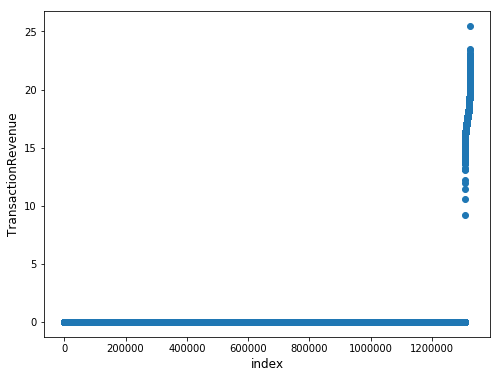

In [11]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
temp = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(temp.shape[0]), np.sort(np.log1p(temp["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [12]:
nonzero_tR = pd.notnull(train_df["totals.transactionRevenue"]).sum()
u_nonzero_tR = (temp["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nonzero_tR, "| Ratio : ", nonzero_tR / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", u_nonzero_tR, "| Ratio: ", u_nonzero_tR / temp.shape[0])

Number of instances in train set with non-zero revenue :  18514 | Ratio :  0.010837440153786987
Number of unique customers with non-zero revenue :  16141 | Ratio:  0.012193574218307359


In [13]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique(), " out of ",train_df.shape[0], 'rows.')
#print("Number of unique visitors in train set : ",test_df.fullVisitorId.nunique(), " out of ",test_df.shape[0], 'rows.')
print("Number of common visitors in train and test set : ",len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

Number of unique visitors in train set :  1323730  out of  1708337 rows.
Number of common visitors in train and test set :  2759


In [14]:
y = np.nan_to_num(np.array([float(i) for i in train_df['totals.transactionRevenue']]))
print('The ratio of customers with transaction revenue is', str((y != 0).mean()))

The ratio of customers with transaction revenue is 0.010837440153786987


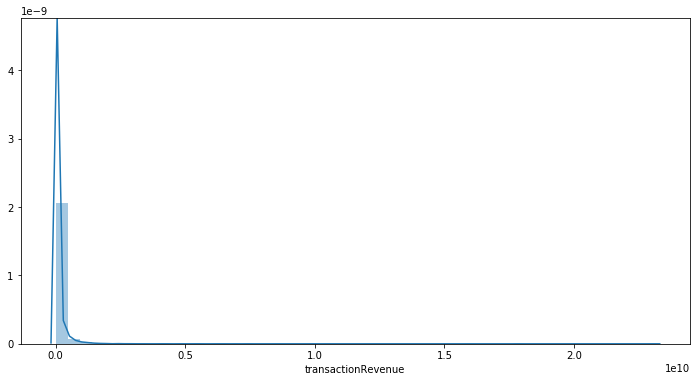

In [15]:
plt.figure(figsize=[12, 6])
sns.distplot(y[y!=0])
plt.xlabel('transactionRevenue')
plt.show()

In [16]:
# target variable distribution
# nat.log of sum for total transaction revenue per user
target_var = np.log1p(train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum())

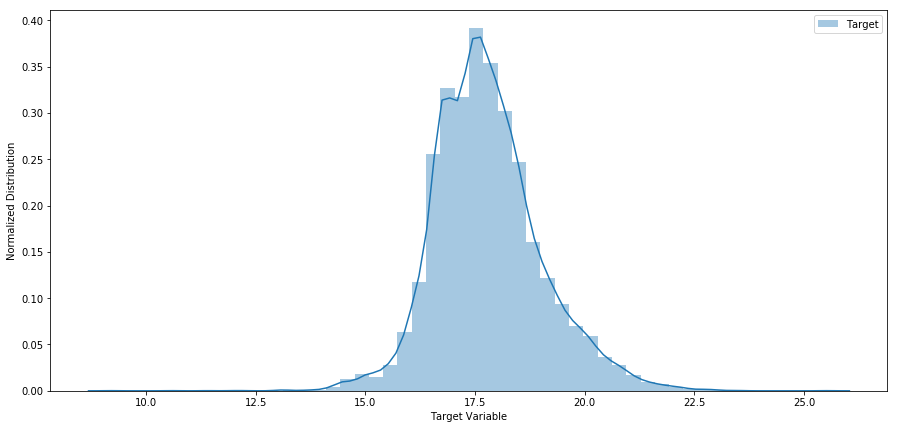

In [17]:
plt.subplots(figsize=(15,7))
sns.distplot(target_var[target_var != 0], label='Target').legend() # non-zero transactions
plt.xlabel('Target Variable')
plt.ylabel('Normalized Distribution')
plt.show()

## Categorical Data Exploration

In [73]:
# Define a function to plot the count of categorical variables (ratio)
# Credit: https://www.kaggle.com/sz8416/lb-1-4439-gacr-prediction-eda-lgb-baseline

def plot_categorical(data, col, size=[8, 4], xlabel_angle=0, title='', max_cat = None):
    plotdata = data[col].value_counts() / len(data)
    
    if max_cat != None:   # if there is maximum number of variables (coz too many variables)
        plotdata = plotdata[max_cat[0]:max_cat[1]]
    
    plt.figure(figsize = size)
    ax = sns.barplot(x = plotdata.index, y=plotdata.values)
    
    plt.title(title, fontsize=15)
    
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    ax.set_xticklabels(data[col].value_counts().index.tolist(), fontsize=11)
    plt.ylabel('Ratio', fontsize=15)
    #plt.savefig(title + '.png')
    plt.show()

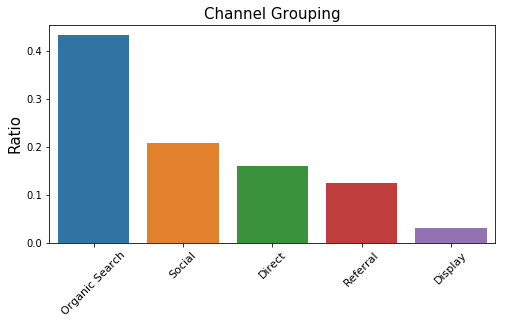

In [74]:
plot_categorical(data=train_df, col='channelGrouping', xlabel_angle=45, title='Channel Grouping', max_cat=[0, 5])

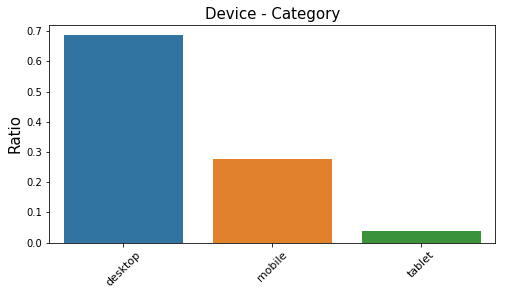

In [75]:
plot_categorical(data=train_df, col='device.deviceCategory', xlabel_angle=45, title='Device - Category', max_cat=[0, 5])

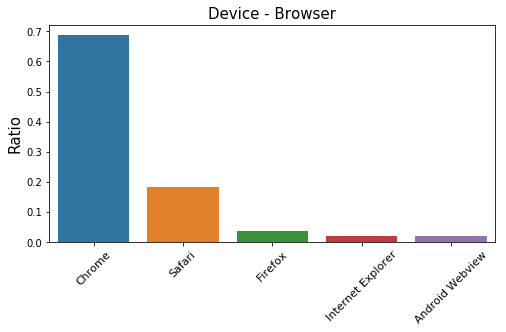

In [76]:
plot_categorical(data=train_df, col='device.browser', xlabel_angle=45, title='Device - Browser', max_cat=[0, 5])

In [77]:
plot_categorical(data=train_df, col='device.isMobile', title='Mobile Device', max_cat=[0, 5])

In [78]:
train_df['totals.newVisits'] = train_df['totals.newVisits'].fillna('0')
plot_categorical(data=train_df, col='totals.newVisits', xlabel_angle=0, title='Totals - NewVisits')

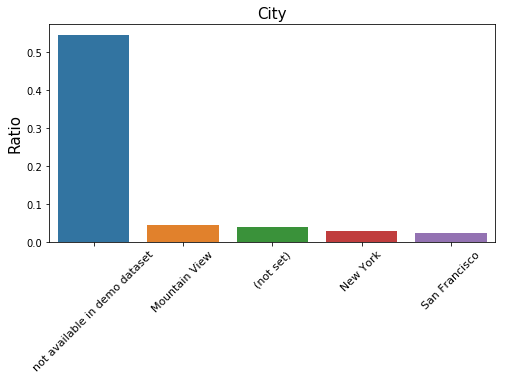

In [79]:
plot_categorical(data=train_df, col='geoNetwork.city', xlabel_angle=45, title='City', max_cat=[0, 5])

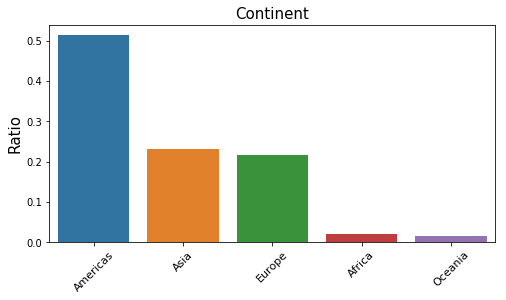

In [80]:
plot_categorical(data=train_df, col='geoNetwork.continent', xlabel_angle=45, title='Continent', max_cat=[0, 5])

In [81]:
plot_categorical(data=train_df, col='geoNetwork.country', xlabel_angle=45, title='Country', max_cat=[0, 5])

In [82]:
plot_categorical(data=train_df, col='geoNetwork.metro', xlabel_angle=45, title='Metro', max_cat=[0, 5])

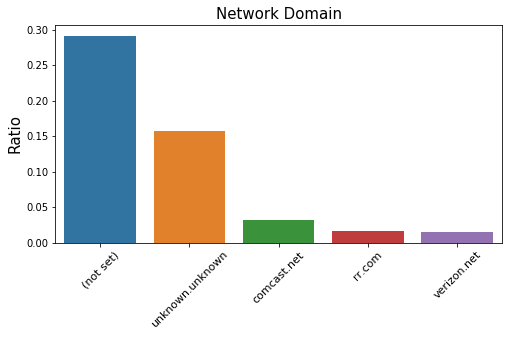

In [83]:
plot_categorical(data=train_df, col='geoNetwork.networkDomain', xlabel_angle=45, title='Network Domain', max_cat=[0, 5])

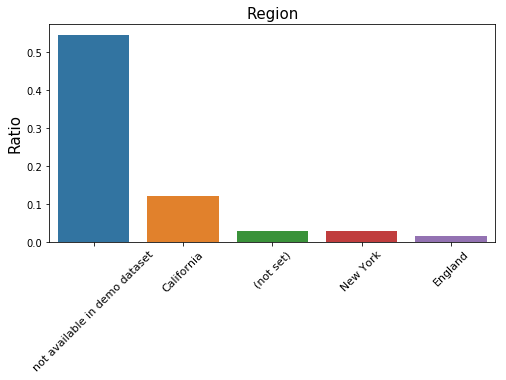

In [84]:
plot_categorical(data=train_df, col='geoNetwork.region', xlabel_angle=45, title='Region', max_cat=[0, 5])

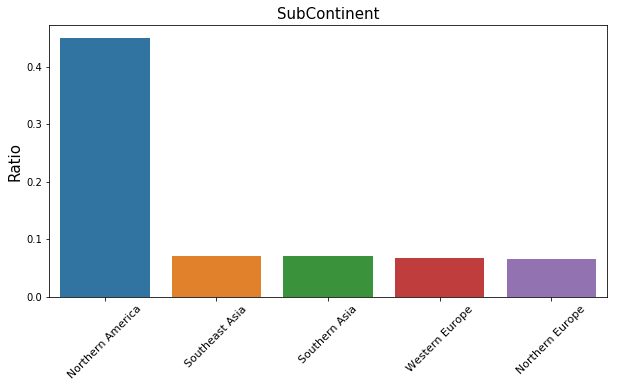

In [51]:
plot_categorical(data=train_df, col='geoNetwork.subContinent', xlabel_angle=45, title='SubContinent', max_cat=[0, 5])

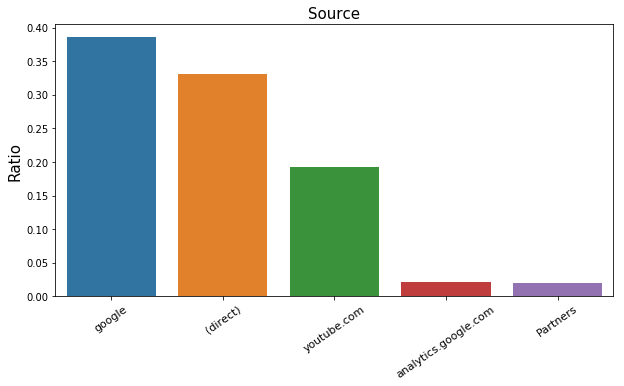

In [56]:
plot_categorical(data=train_df, col='trafficSource.source', xlabel_angle=35, title='Source', max_cat=[0, 5])

In [57]:
plot_categorical(data=train_df, col='trafficSource.referralPath', xlabel_angle=35, title='ReferralPath', max_cat=[0, 5])

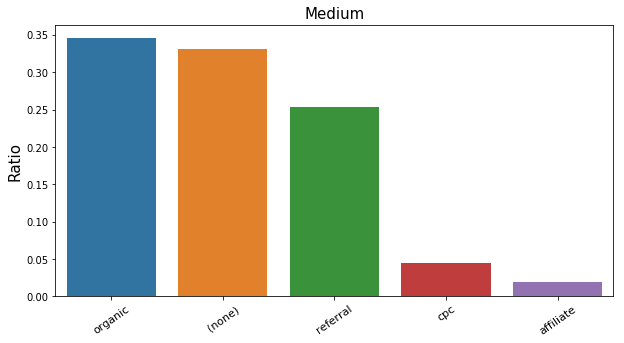

In [58]:
plot_categorical(data=train_df, col='trafficSource.medium', xlabel_angle=35, title='Medium', max_cat=[0, 5])

In [33]:
tmp = train_df['date'].value_counts().to_frame().reset_index().sort_values('index')
tmp = tmp.rename(columns = {"index" : "dateX", "date" : "visits"})

tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["visits"])
layout = go.Layout(title="Visits by date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)

In [34]:
tmp = train_df.groupby("date").agg({"totals.transactionRevenue" : "mean"}).reset_index()
tmp = tmp.rename(columns = {"date" : "dateX", "totals.transactionRevenue" : "mean_revenue"})
tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["mean_revenue"])
layout = go.Layout(title="MonthlyRevenue by date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)